In [3]:
import pandas as pd

fname = '../../PNC2/pht003445.txt'

df = pd.read_table(fname, comment='#')

print(df)

       dbGaP_Subject_ID        SUBJID  INT_NUM INT_TYPE        Race Sex  \
0                791086  600001103037        1       MP          AA   M   
1                791086  600001103037        2       MI          AA   M   
2                791087  600001676724        1       AP          AA   F   
3                791088  600003245643        1      YPI          AA   M   
4                791090  600004963801        1       MP          EA   F   
...                 ...           ...      ...      ...         ...  ..   
14636            800198  609993878116        2       MI          EA   M   
14637            800199  609998081561        1       MP  EA,HI + OT   M   
14638            800199  609998081561        2       MI  EA,HI + OT   M   
14639            800200  609999144528        1       MP          EA   F   
14640            800200  609999144528        2       MI          EA   F   

       Med_birth_year Med_Rating  ADD011  ADD012  ...  SUB_OTC  SUB_PSY  \
0              1999.0   

/tmp/ipykernel_53521/1203871330.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(fname, comment='#')


In [8]:
# Get subjects from demographics file

import pickle

demofile = '../../ImageNomer/data/anton/cohorts/test/demographics.pkl'

with open(demofile, 'rb') as f:
    demo = pickle.load(f)
    
for key in ['age', 'sex', 'wrat']:
    print(len(list(demo[key].keys())))
    
sublst = list(demo['age'].keys())
sublst = [int(sub) for sub in sublst]
print(sublst[:2])

830
830
830
[605485715456, 605971292161]


In [21]:
# Race for subjects

import math

demo['race'] = dict()

for sub in sublst:
    r = df[(df['SUBJID'] == sub) & (df['INT_NUM'] == 1)]['Race']
    r = r.values[0]
    if isinstance(r, float) and math.isnan(r):
        print(sub)
        r = 'Missing'
    demo['race'][str(sub)] = r
    
print(len(list(demo['race'].keys())))

600635899969
605674075165
607914130481
604473175469
604968175212
830


In [22]:
# Save new demographics info

with open(demofile, 'wb') as f:
    pickle.dump(demo, f)
    
print('Complete')

Complete


(2, 3)
3


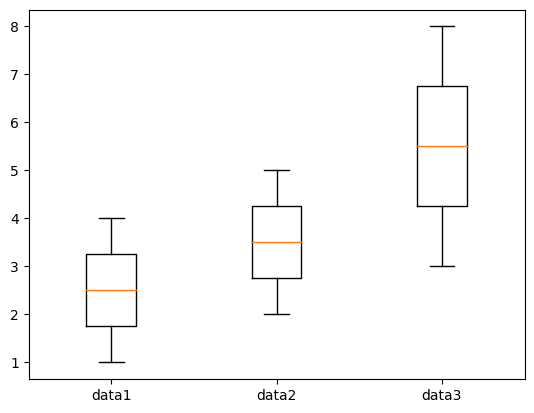

In [26]:
import matplotlib.pyplot as plt
import numpy as np

data = np.array([[1,2,3],[4,5,8]])
labels = ['data1', 'data2', 'data3']
print(data.shape)
print(len(labels))

plt.boxplot(data, labels=labels)
plt.show()